In [20]:
from travelling_salesman import Route, create_initial_random, create_initial_greedy, node_swapper, map24, map150
from matplotlib import pyplot as plt
import random

def calc_fitness(population):
    total_fitness = max([1/r.distance for r in population])
    # this fitness function compares the distance to the best distance achieved (100%) and ^4 the result, to ensure greater variety in fitness scores
    for r in population:
        r.fitness = ((1/r.distance)/total_fitness)**4
    population.sort(key=lambda r: r.fitness, reverse=True)
    return population

# function for creating initial populations
def create_population(map, popsize, random=True):
    population = []
    if random == True:
        for i in range(popsize):
            population.append(Route(map, create_initial_random(map)))
    else:
        for i in range(popsize):
            population.append(Route(map, create_initial_greedy(map)))
    return calc_fitness(population)

def selection(population):
    # 10% elite that gets selected automatically
    elite = int(len(population)/10)
    selected = population[:elite]
    while len(selected) < len(population):
        i = random.choice(population)
        if i.fitness > random.random():
            selected.append(i)
    selected = calc_fitness(selected)
    # shuffling the routes, to enable random crossover
    random.shuffle(selected)
    return selected

def crossover(population):
    children = []
    for i in range(0, len(population)):
        parent1_path = population[i].path
        parent2_path = population[(i+1)%len(population)].path
        a = random.randrange(len(parent1_path))
        b = random.randrange(len(parent1_path))
        # # uncomment below to crossover every time
        # # using a & b instead of start & stop crosses over only when b is greater than a
        # # do not use with max_no_improv
        # start = min(a, b)
        # stop = max(a, b) + 1
        child_path = parent1_path[a:b] # parent1_path[start:stop] or parent1_path[a:b] depending on the above
        for node in parent2_path:
            if node not in child_path:
                child_path.append(node)
        children.append(Route(population[i].map, child_path))
    return calc_fitness(children)

# # crossover every time keeping 50% of nodes from on parent
# # do not use with max_no_improv
# def crossover(population):
#     children = []
#     for i in range(0, len(population)):
#         parent1_path = population[i].path
#         parent2_path = population[(i+1)%len(population)].path
#         split = int(len(parent1_path)/2)
#         child_path = parent1_path[:split]
#         for node in parent2_path:
#             if node not in child_path:
#                 child_path.append(node)
#         children.append(Route(population[i].map, child_path))
#     return calc_fitness(children)

def mutation(population):
    for i in population:
        #the chance of mutation increases in less fit specimen
        if random.random() > i.fitness:
            i.update_path(node_swapper(i.path))
    return calc_fitness(population)


def run_genetic_algorithm(map, popsize, max_no_improv=0, max_iterations=0):
    distances = []
    starting_population = create_population(map, popsize)
    print("Running Genetic Algorithm")
    print("Best initial random route:")
    starting_population[0].plot()
    if max_no_improv > 0:
        no_improvement_for = 0
        while no_improvement_for < max_no_improv:
            distances.append(starting_population[0].distance)
            select = selection(starting_population)
            children = crossover(select)
            starting_population = mutation(children)
            if starting_population[0].distance >= distances[-1]:
                no_improvement_for += 1
            else:
                no_improvement_for = 0
    elif max_iterations > 0:
        iterations = 0
        while iterations < max_iterations:
            distances.append(starting_population[0].distance)
            select = selection(starting_population)
            children = crossover(select)
            starting_population = mutation(children)
            iterations += 1
    print(f"Best route after {len(distances)} iterations:")
    starting_population[0].plot()
    plt.figure(figsize=(6, 5))
    plt.subplots_adjust(top=0.8)
    plt.plot(distances)
    plt.suptitle(f"Number of nodes = {len(starting_population[0].path)}\nPopulation size = {popsize}\nStarting distance = {distances[0]}\nFinal Distance = {distances[-1]}")
    plt.show()

Running Genetic Algorithm
Best initial random route:


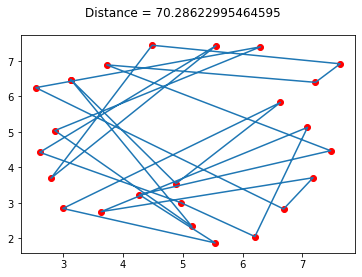

Best route after 1000 iterations:


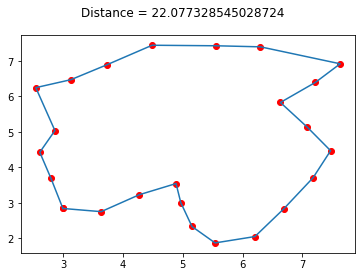

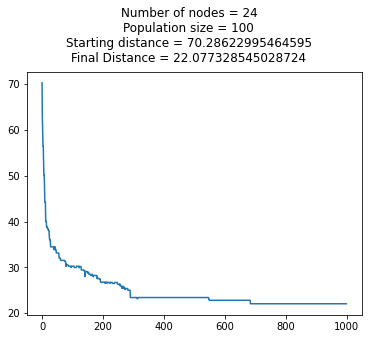

Wall time: 1.39 s


In [23]:
%%time
run_genetic_algorithm(map24, 100, max_iterations=1000)

Running Genetic Algorithm
Best initial random route:


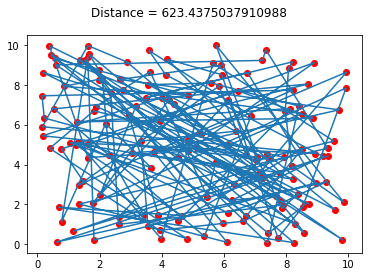

Best route after 1000 iterations:


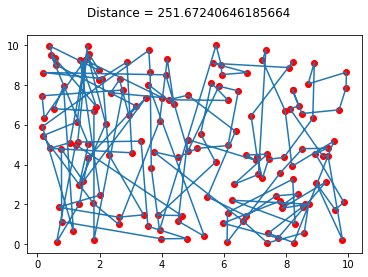

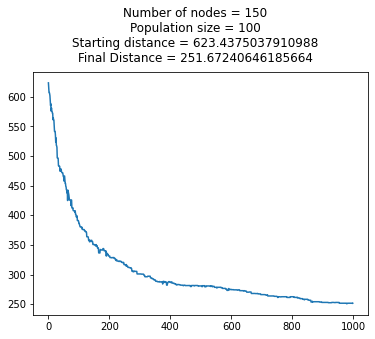

Wall time: 12.9 s


In [24]:
%%time
run_genetic_algorithm(map150, 100, max_iterations=1000)